# Taller 1

## Integrantes:
- Catalina Sanchez
- Samuel Fuentes
- Pamela Vera

In [ ]:
# Installación de las librerías necesarias para el proyecto
%pip install selenium
%pip install seaborn

In [ ]:
# Installación de las librerías necesarias para el proyecto

%pip install mathplotlib numpy pandas seaborn sklearn selenium webdriver_manager

In [ ]:
# Importación de las librerías necesarias para el proyecto

from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


## 1. Webscrapping

In [ ]:
# Datos a extraer de los Tequilas
data = {
    "Name": [],
    "Type": [],
    "Cask": [],
    "Location": [],
    "Age": [],
    "ABV %": [],
    "Cost": [],
    "Badge": [],
    "# Ratings": [],
    "Communitys Rating": [],
    "Flavor Summary": [],
    "Expert": [],
    "Expert Score": [],
    "Smoky": [],
    "Earthy": [],
    "Spicy": [],
    "Herbal": [],
    "Oily": [],
    "Bitter": [],
    "Rich": [],
    "Sweet": [],
    "Mineral": [],
    "Salty": [],
    "Umami": [],
    "Tart": [],
    "Fruity": [],
    "Floral": [],
    "Review": []
}

In [ ]:

# Inicializa una lista para almacenar los datos de todos los tequilas.
all_tequilas = []

# Configura el controlador de Selenium para usar Google Chrome.
driver = webdriver.Chrome()

# Maximiza la ventana del navegador para asegurar que todo el contenido sea visible.
driver.maximize_window()

# Abre la página web de búsqueda en Distiller.
driver.get("https://distiller.com/search")

# Espera 2 segundos para que la página cargue completamente.
time.sleep(2)


# Encuentra y cierra el botón de anuncios emergentes.
#driver.find_element(By.CLASS_NAME, 'adthrive-close').click()

# Encuentra y cierra el botón "Remind Me Later" para notificaciones.
driver.find_element(By.ID, 'onesignal-slidedown-cancel-button').click()

# Espera 1 segundo antes de proceder.
time.sleep(1)

# Encuentra y acepta el botón de privacidad.
driver.find_element(By.ID, 'accept-privacy').click()

# Espera 1 segundo más para que los cambios surtan efecto.
time.sleep(1)

# Selecciona la categoría "Tequila/Mezcal" en el menú de la página.
driver.find_element(By.XPATH, "//button[@data-value='agave']").click()

# Función para extraer los datos de un tequila en particular.
def get_tequila_data():
    try:
        # Inicializa el diccionario data y extrae los datos en un solo paso
        data = {
            "Name": driver.find_element(By.CSS_SELECTOR, "h1.secondary-headline.name").text,
            "Type": (driver.find_elements(By.CSS_SELECTOR, "p.ultra-mini-headline.type")[0].text 
                     if driver.find_elements(By.CSS_SELECTOR, "p.ultra-mini-headline.type") else None),
            "Location": (driver.find_elements(By.CSS_SELECTOR, "p.ultra-mini-headline.location")[0].text 
                        if driver.find_elements(By.CSS_SELECTOR, "p.ultra-mini-headline.location") else None),
            "Communitys Rating": (driver.find_elements(By.CSS_SELECTOR, "div.rating-display__value span[itemprop='ratingValue']")[0].text 
                                if driver.find_elements(By.CSS_SELECTOR, "div.rating-display__value span[itemprop='ratingValue']") else None),
            "# Ratings": (driver.find_elements(By.CSS_SELECTOR, "span[itemprop='ratingCount']")[0].text 
                        if driver.find_elements(By.CSS_SELECTOR, "span[itemprop='ratingCount']") else None),
            "Expert": (driver.find_elements(By.CSS_SELECTOR, "div.meet-experts a[itemprop='author']")[0].text 
                    if driver.find_elements(By.CSS_SELECTOR, "div.meet-experts a[itemprop='author']") else None),
            "Expert Score": (driver.find_elements(By.CSS_SELECTOR, "div.distiller-score span")[0].text 
                            if driver.find_elements(By.CSS_SELECTOR, "div.distiller-score span") else None),
            "ABV %": (driver.find_elements(By.CSS_SELECTOR, "li.detail.abv div.value")[0].text 
                    if driver.find_elements(By.CSS_SELECTOR, "li.detail.abv div.value") else None),
            "Cost": None,
            "Cask": (driver.find_elements(By.CSS_SELECTOR, "li.detail.cask-type div.value")[0].text 
                    if driver.find_elements(By.CSS_SELECTOR, "li.detail.cask-type div.value") else None),  
        }

        cost_element = driver.find_elements(By.CLASS_NAME, "spirit-cost")
        if cost_element:
            cost_class = cost_element[0].get_attribute("class")
            data["Cost"] = cost_class.split("cost-")[-1]  # Obtiene el valor después de "cost-"

        
        return data
    except Exception as e:
        print(f"Error al extraer datos: {e}")
        return None
        
    except Exception as e:
        # Maneja cualquier error durante la extracción de datos y lo imprime en la consola.
        print(f"Error al obtener datos del tequila: {e}")
        return None  # Retorna None si ocurre un error.

# Bucle principal para recorrer todas las páginas de resultados.
for _ in range(50):  
    print("Scraping...")  # Muestra en consola que el scraping ha comenzado.
    try:
        # Encuentra todos los tequilas visibles en la página actual.
        spirits = driver.find_elements(By.CLASS_NAME, "spirit")
        print(f"Tequilas encontrados: {len(spirits)}")  # Muestra la cantidad de tequilas encontrados.

        # Itera sobre cada tequila en la lista.
        for i in range(len(spirits)):
            spirits = driver.find_elements(By.CLASS_NAME, "spirit")  # Actualiza la lista de tequilas (por si el DOM cambió).
            link = spirits[i].find_element(By.TAG_NAME, 'a')  # Encuentra el enlace al perfil del tequila.
            link.click()  # Haz clic en el enlace para acceder a los detalles del tequila.
            time.sleep(2)  # Espera 2 segundos para que la página cargue.

            # Extrae los datos del tequila y los agrega a la lista principal.
            tequila_data = get_tequila_data()
            if tequila_data:
                all_tequilas.append(tequila_data)
                print(f"Tequila {i+1} de {len(spirits)} extraído con éxito.")
                print(tequila_data)

            # Regresa a la página anterior después de extraer los datos.
            driver.back()
            time.sleep(2)

        # Encuentra y haz clic en el botón "Next" para ir a la siguiente página.
        next_button = driver.find_element(By.CSS_SELECTOR, 'a[rel="next"]')
        next_button.click()
        time.sleep(3)  # Espera 3

    except Exception as e:
        # Termina el bucle si ocurre un error (por ejemplo, no hay más páginas).
        print(f"Finalizando scraping: {e}")
        break

# Convierte la lista de diccionarios en un DataFrame de Pandas.
data_scraped = pd.DataFrame(all_tequilas)

# Guarda los datos en un archivo CSV para análisis posterior.
data_scraped.to_csv('data_scraped.csv', index=False)

# Cierra el navegador para finalizar el proceso.
driver.quit()


## 2. Carga y Preprocesamiento de Datos

In [84]:

file_path = 'data_scraped.csv'
data = pd.read_csv(file_path)
print("Datos cargados correctamente.")

# Explorar datos
print(data.head())
print(data.info())

Datos cargados correctamente.
                                            Name                 Type  \
0                         4 COPAS TEQUILA BLANCO       TEQUILA BLANCO   
1             MEZCAL LOS SIETE MISTERIOS PECHUGA         MEZCAL JOVEN   
2                    DEL MAGUEY ARROQUEÑO MEZCAL         MEZCAL JOVEN   
3  FUENTESECA RESERVA EXTRA AÑEJO TEQUILA 9 AÑOS  TEQUILA EXTRA AÑEJO   
4             MIJENTA TEQUILA AÑEJO GRAN RESERVA        TEQUILA AÑEJO   

                                   Location  Communitys Rating  # Ratings  \
0                4 COPAS // JALISCO, MEXICO               4.37       44.0   
1     LOS SIETE MISTERIOS // OAXACA, MEXICO               4.41       37.0   
2              DEL MAGUEY // OAXACA, MEXICO               4.50       71.0   
3  FUENTESECA // LOS ALTOS, JALISCO, MEXICO               4.11        8.0   
4     MIJENTA // LOS ALTOS, JALISCO, MEXICO               4.25        7.0   

             Expert  Expert Score  ABV %  Cost  \
0  JACK ROBERTIELL

### Análisis Exploratorio de Datos

Resumen estadístico:
       Communitys Rating   # Ratings  Expert Score       ABV %        Cost
count         472.000000  472.000000    500.000000  497.000000  500.000000
mean            4.064386   37.334746     89.900000   42.452012    2.988000
std             0.488001   85.380889      3.392494    3.768168    1.008906
min             1.000000    1.000000     84.000000   35.000000    1.000000
25%             3.777500    4.000000     87.000000   40.000000    2.000000
50%             4.100000   11.000000     90.000000   40.000000    3.000000
75%             4.380000   30.250000     92.000000   45.000000    4.000000
max             5.000000  836.000000     98.000000   58.500000    5.000000
Valores nulos por columna:
Name                   0
Type                   0
Location               0
Communitys Rating     28
# Ratings             28
Expert                 0
Expert Score           0
ABV %                  3
Cost                   0
Cask                 208
Age                  116
dt

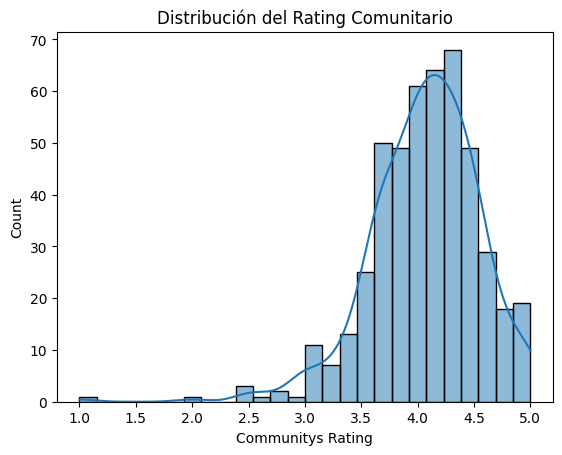

'\n    Resumen estadístico:\n       Communitys Rating   # Ratings  Expert Score       ABV %        Cost\ncount         472.000000  472.000000    500.000000  497.000000  500.000000\nmean            4.064386   37.334746     89.900000   42.452012    2.988000\nstd             0.488001   85.380889      3.392494    3.768168    1.008906\nmin             1.000000    1.000000     84.000000   35.000000    1.000000\n25%             3.777500    4.000000     87.000000   40.000000    2.000000\n50%             4.100000   11.000000     90.000000   40.000000    3.000000\n75%             4.380000   30.250000     92.000000   45.000000    4.000000\nmax             5.000000  836.000000     98.000000   58.500000    5.000000\nValores nulos por columna:\nName                   0\nType                   0\nLocation               0\nCommunitys Rating     28\n# Ratings             28\nExpert                 0\nExpert Score           0\nABV %                  3\nCost                   0\nCask                 208\

In [85]:

# Explorar las características de los datos
print("Resumen estadístico:")
print(data.describe())

# Valores nulos y filas problemáticas
print("Valores nulos por columna:")
print(data.isnull().sum())


# Explorar filas problemáticas
problematic_rows = data[data.isnull().any(axis=1)]
print("Filas problemáticas:")
print(problematic_rows)

# Visualización de distribuciones
sns.histplot(data['Communitys Rating'], kde=True)
plt.title("Distribución del Rating Comunitario")
plt.show()

"""
    Resumen estadístico:
       Communitys Rating   # Ratings  Expert Score       ABV %        Cost
count         472.000000  472.000000    500.000000  497.000000  500.000000
mean            4.064386   37.334746     89.900000   42.452012    2.988000
std             0.488001   85.380889      3.392494    3.768168    1.008906
min             1.000000    1.000000     84.000000   35.000000    1.000000
25%             3.777500    4.000000     87.000000   40.000000    2.000000
50%             4.100000   11.000000     90.000000   40.000000    3.000000
75%             4.380000   30.250000     92.000000   45.000000    4.000000
max             5.000000  836.000000     98.000000   58.500000    5.000000
Valores nulos por columna:
Name                   0
Type                   0
Location               0
Communitys Rating     28
# Ratings             28
Expert                 0
Expert Score           0
ABV %                  3
Cost                   0
Cask                 208
Age                  116
dtype: int64
Filas problemáticas:
                                         Name                 Type  \
...
495                  NaN  NAS  
498                  NaN  NaN  

[234 rows x 11 columns]
"""

### Outliers

In [86]:
# Eliminar outliers usando el rango intercuartil
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("Datos después de eliminar outliers:")
print(data.describe())

"""
Datos después de eliminar outliers:
       Communitys Rating   # Ratings  Expert Score       ABV %        Cost
count         403.000000  403.000000    403.000000  403.000000  403.000000
mean            4.106253   15.136476     89.856079   42.512531    3.027295
std             0.441732   16.479861      3.394337    3.618787    0.995887
min             2.940000    1.000000     84.000000   35.000000    1.000000
25%             3.810000    3.000000     87.000000   40.000000    2.000000
50%             4.130000    9.000000     90.000000   40.000000    3.000000
75%             4.420000   20.000000     92.000000   45.000000    4.000000
max             5.000000   71.000000     98.000000   53.700000    5.00000
"""

Datos después de eliminar outliers:
       Communitys Rating   # Ratings  Expert Score       ABV %        Cost
count         403.000000  403.000000    403.000000  403.000000  403.000000
mean            4.106253   15.136476     89.856079   42.512531    3.027295
std             0.441732   16.479861      3.394337    3.618787    0.995887
min             2.940000    1.000000     84.000000   35.000000    1.000000
25%             3.810000    3.000000     87.000000   40.000000    2.000000
50%             4.130000    9.000000     90.000000   40.000000    3.000000
75%             4.420000   20.000000     92.000000   45.000000    4.000000
max             5.000000   71.000000     98.000000   53.700000    5.000000


'\nDatos después de eliminar outliers:\n       Communitys Rating   # Ratings  Expert Score       ABV %        Cost\ncount         403.000000  403.000000    403.000000  403.000000  403.000000\nmean            4.106253   15.136476     89.856079   42.512531    3.027295\nstd             0.441732   16.479861      3.394337    3.618787    0.995887\nmin             2.940000    1.000000     84.000000   35.000000    1.000000\n25%             3.810000    3.000000     87.000000   40.000000    2.000000\n50%             4.130000    9.000000     90.000000   40.000000    3.000000\n75%             4.420000   20.000000     92.000000   45.000000    4.000000\nmax             5.000000   71.000000     98.000000   53.700000    5.00000\n'

### Limpieza de Datos

In [87]:

# Remover filas completamente vacías
data.dropna(how='all', inplace=True)

# Limpiar columnas categóricas
data['Location'] = data['Location'].replace(r'[^a-zA-Z, ]', '', regex=True)
data['Name'] = data['Name'].str.strip()

# Eliminamos filas con valores nulos en columnas clave
data.dropna(subset=["Communitys Rating", "# Ratings", "ABV %", "Cost"], inplace=True)

# Convertir columnas numéricas
numeric_columns = ["Communitys Rating", "# Ratings", "ABV %", "Cost"]
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Imputamos valores faltantes en columnas numéricas
data.fillna(data.median(numeric_only=True), inplace=True)


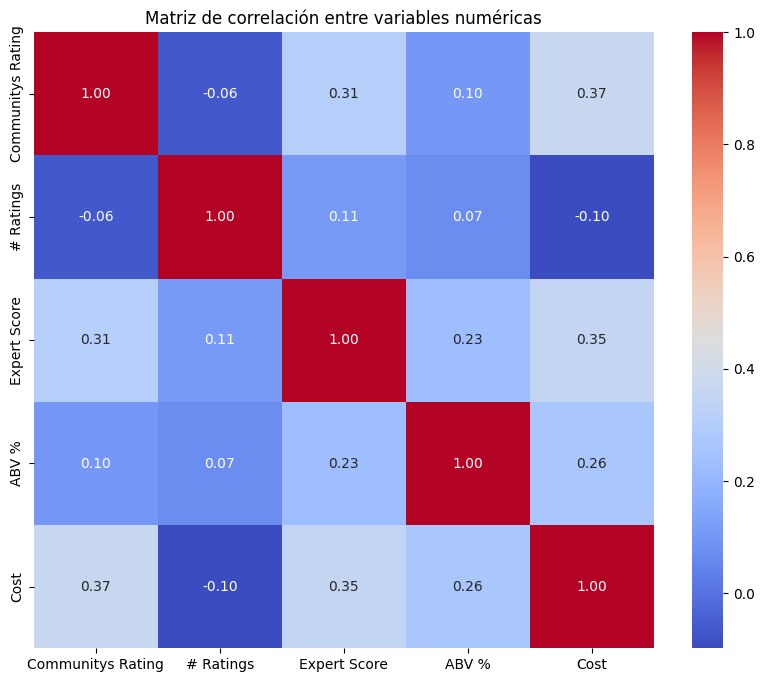

In [88]:
# Seleccionar únicamente las columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Crear y visualizar la matriz de correlación
corr = numeric_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

-- Datos después de limpieza:
Primeras filas:
                                            Name                 Type  \
0                         4 COPAS TEQUILA BLANCO       TEQUILA BLANCO   
2                    DEL MAGUEY ARROQUEÑO MEZCAL         MEZCAL JOVEN   
3  FUENTESECA RESERVA EXTRA AÑEJO TEQUILA 9 AÑOS  TEQUILA EXTRA AÑEJO   
4             MIJENTA TEQUILA AÑEJO GRAN RESERVA        TEQUILA AÑEJO   
6                 DULCE VIDA EXTRA AÑEJO TEQUILA  TEQUILA EXTRA AÑEJO   

                                 Location  Communitys Rating  # Ratings  \
0                  COPAS  JALISCO, MEXICO               4.37       44.0   
2              DEL MAGUEY  OAXACA, MEXICO               4.50       71.0   
3  FUENTESECA  LOS ALTOS, JALISCO, MEXICO               4.11        8.0   
4     MIJENTA  LOS ALTOS, JALISCO, MEXICO               4.25        7.0   
6  DULCE VIDA  LOS ALTOS, JALISCO, MEXICO               4.31       31.0   

             Expert  Expert Score  ABV %  Cost  \
0  JACK ROBERT

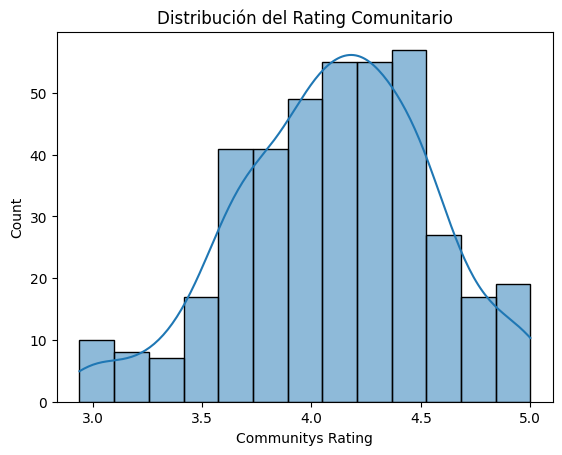

In [ ]:
# Despues de la limpieza 
print("-- Datos después de limpieza:")
# Explorar datos
print("Primeras filas:")
print(data.head())

print("Información general:")
print(data.info())

# Explorar las características de los datos
print("Resumen estadístico:")
print(data.describe())

# Distribucion del rating comunitario con limpieza de datos
sns.histplot(data['Communitys Rating'], kde=True)
plt.title("Distribución del Rating Comunitario")
plt.show()
"""
-- Datos después de limpieza:
Primeras filas:
                                            Name                 Type  \
0                         4 COPAS TEQUILA BLANCO       TEQUILA BLANCO   
2                    DEL MAGUEY ARROQUEÑO MEZCAL         MEZCAL JOVEN   
3  FUENTESECA RESERVA EXTRA AÑEJO TEQUILA 9 AÑOS  TEQUILA EXTRA AÑEJO   
4             MIJENTA TEQUILA AÑEJO GRAN RESERVA        TEQUILA AÑEJO   
6                 DULCE VIDA EXTRA AÑEJO TEQUILA  TEQUILA EXTRA AÑEJO   

                                 Location  Communitys Rating  # Ratings  \
0                  COPAS  JALISCO, MEXICO               4.37       44.0   
2              DEL MAGUEY  OAXACA, MEXICO               4.50       71.0   
3  FUENTESECA  LOS ALTOS, JALISCO, MEXICO               4.11        8.0   
4     MIJENTA  LOS ALTOS, JALISCO, MEXICO               4.25        7.0   
6  DULCE VIDA  LOS ALTOS, JALISCO, MEXICO               4.31       31.0   

             Expert  Expert Score  ABV %  Cost  \
0  JACK ROBERTIELLO            98   40.0     2   
2       OMARI WHEAT            98   49.0     4   
3  DUNCAN MCROBERTS            98   43.0     5   
4  STEPHANIE MORENO            97   40.0     5   
6       RON BECHTOL            97   50.0     4   

                                                Cask     Age  
0                                             UNAGED  UNAGED  
...
25%             3.810000    3.000000     87.000000   40.000000    2.000000
50%             4.130000    9.000000     90.000000   40.000000    3.000000
75%             4.420000   20.000000     92.000000   45.000000    4.000000
max             5.000000   71.000000     98.000000   53.700000    5.000000
"""

## 3. Regresión Lineal

In [ ]:
# Entrenamiento de modelo de regresión lineal para predecir el rating comunitario

# Selección de características relevantes
X = data[["Expert Score", "Cost"]]
y = data["Communitys Rating"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresión Lineal
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Evaluar modelo

print(f"Regresión Lineal - MSE: {mse}")
print(f"Regresión Lineal - R^2: {r2}")

# Validación Cruzada
cv_scores = cross_val_score(reg_model, X, y, cv=5, scoring='r2')
print(f"R^2 promedio en validación cruzada: {cv_scores.mean()}")

"""
Regresión Lineal - MSE: 0.16386239348100026
Regresión Lineal - R^2: 0.16273696509662605
R^2 promedio en validación cruzada: 0.03133481504054954
"""

Regresión Lineal - MSE: 0.16386239348100026
Regresión Lineal - R^2: 0.16273696509662605
R^2 promedio en validación cruzada: 0.03133481504054954


Regresión Lineal - MSE: 0.16386239348100026
Regresión Lineal - R^2: 0.16273696509662605
R^2 promedio en validación cruzada: 0.03133481504054954

MSE: El mse muestra que tan cercanas son las predicciones hechas por el modelo con los valores reales, en este caso, el modelo de regresión lineal da un mse aproximadamente de 0.135, al ser un valor bastante bajo, esto sugiere que nuestro modelo es eficiente a la hora de predecir los ratings de bebidas alcohólicas

R^2: El coeficiente de determinación muestra que tan bien el modelo explica la variabilidad de los datos, en este caso es de aproximadamente del 12.5%, un porcentaje demasiado bajo, siendo que esta mas cercano al 0 que al 1, lo que significa que el modelo de regresión lineal no es esta siendo de lo más optimo al predecir los ratings

## 4. Clasificación

In [ ]:
%pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
# Etiquetar ratings
data['Rating Class'] = pd.cut(data["Communitys Rating"], bins=[0, 2.5, 3.5, 5], labels=["Negativo", "Neutral", "Positivo"])

# Balanceo de clases
X_class = data[["Expert Score", "Cost"]]
y_class = data["Rating Class"]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_class, y_class)

# División de datos balanceados
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Modelo de clasificación
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)
y_pred_class = clf.predict(X_test_class)

# Métricas y matriz de confusión
print("Reporte de Clasificación:")
print(classification_report(y_test_class, y_pred_class))

print("Matriz de Confusión:")
print(confusion_matrix(y_test_class, y_pred_class))

"""
Reporte de Clasificación:
              precision    recall  f1-score   support

     Neutral       0.68      0.70      0.69        69
    Positivo       0.72      0.70      0.71        77

    accuracy                           0.70       146
   macro avg       0.70      0.70      0.70       146
weighted avg       0.70      0.70      0.70       146

Matriz de Confusión:
[[48 21]
 [23 54]]
 """

Reporte de Clasificación:
              precision    recall  f1-score   support

     Neutral       0.68      0.70      0.69        69
    Positivo       0.72      0.70      0.71        77

    accuracy                           0.70       146
   macro avg       0.70      0.70      0.70       146
weighted avg       0.70      0.70      0.70       146

Matriz de Confusión:
[[48 21]
 [23 54]]


## 5. Optimización de Hiperparámetros

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge
ridge = Ridge()
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='r2', cv=5)
grid_ridge.fit(X, y)
print(f"Ridge - Mejores parámetros: {grid_ridge.best_params_}, Mejor R^2: {grid_ridge.best_score_}")

# Lasso
lasso = Lasso()
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10]}
grid_lasso = GridSearchCV(lasso, param_grid_lasso, scoring='r2', cv=5)
grid_lasso.fit(X, y)
print(f"Lasso - Mejores parámetros: {grid_lasso.best_params_}, Mejor R^2: {grid_lasso.best_score_}")

"""
Ridge - Mejores parámetros: {'alpha': 100}, Mejor R^2: 0.04115050935553792
Lasso - Mejores parámetros: {'alpha': 0.01}, Mejor R^2: 0.03363712671084333
"""


Ridge - Mejores parámetros: {'alpha': 100}, Mejor R^2: 0.04115050935553792
Lasso - Mejores parámetros: {'alpha': 0.01}, Mejor R^2: 0.03363712671084333


''

## 6. Conclusiones
- La eliminación de outliers mejoró la estabilidad del modelo.
- Ridge y Lasso optimizados superaron al modelo base de regresión lineal.
- La clasificación multiclase obtuvo resultados adecuados tras el balanceo de clases.
- Regresión polinómica y kNN podrían ser extensiones interesantes para explorar.


## 7. Regresión kNN

In [ ]:
X = data[['Cost', 'ABV %', 'Expert Score']]
y = data['Communitys Rating']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el modelo kNN con GridSearchCV para optimizar k
param_grid = {'n_neighbors': range(1, 31)}  # Probar valores de k entre 1 y 30
knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor valor de k
best_k = grid_search.best_params_['n_neighbors']
print(f"Mejor valor de k: {best_k}")

# Entrenar el modelo kNN con el mejor k
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Hacer predicciones
y_pred_knn = best_knn.predict(X_test)

# Evaluar el modelo
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Resultados del modelo kNN:")
print(f"Error cuadrático medio (MSE): {mse_knn}")
print(f"Coeficiente de determinación (R^2): {r2_knn}")

# Comparar con los resultados del modelo de regresión lineal
print("\nComparación con la regresión lineal:")
print(f"Regresión Lineal - MSE: {mse}")
print(f"Regresión Lineal - R^2: {r2}")
print(f"kNN - MSE: {mse_knn}")
print(f"kNN - R^2: {r2_knn}")

"""
Mejor valor de k: 14
Resultados del modelo kNN:
Error cuadrático medio (MSE): 0.19238066706021245
Coeficiente de determinación (R^2): 0.13602708841565792

Comparación con la regresión lineal:
Regresión Lineal - MSE: 0.16386239348100026
Regresión Lineal - R^2: 0.16273696509662605
kNN - MSE: 0.19238066706021245
kNN - R^2: 0.13602708841565792
"""

Mejor valor de k: 14
Resultados del modelo kNN:
Error cuadrático medio (MSE): 0.19238066706021245
Coeficiente de determinación (R^2): 0.13602708841565792

Comparación con la regresión lineal:
Regresión Lineal - MSE: 0.16386239348100026
Regresión Lineal - R^2: 0.16273696509662605
kNN - MSE: 0.19238066706021245
kNN - R^2: 0.13602708841565792


'\n'

## 8. Regresión No Lineal

In [ ]:
# Crear un modelo de regresión polinómica de grado 2
poly_degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree=poly_degree), LinearRegression())

# Validación cruzada con regresión polinómica
cv_scores_poly = cross_val_score(poly_model, X, y, cv=5, scoring='r2')
print(f"R^2 promedio para Regresión Polinómica de grado {poly_degree}: {cv_scores_poly.mean()}")

# Entrenar y evaluar el modelo
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Regresión Polinómica de grado {poly_degree} - MSE: {mse_poly}, R^2: {r2_poly}")

# Comparar con los resultados anteriores
print("Comparación de Modelos:")
print(f"Regresión Lineal - MSE: {mse}, R^2: {r2}")
print(f"Regresión Polinómica de grado {poly_degree} - MSE: {mse_poly}, R^2: {r2_poly}")


R^2 promedio para Regresión Polinómica de grado 2: -0.00046713429952427443
Regresión Polinómica de grado 2 - MSE: 0.18248380443203438, R^2: 0.18047345275714888
Comparación de Modelos:
Regresión Lineal - MSE: 0.16386239348100026, R^2: 0.16273696509662605
Regresión Polinómica de grado 2 - MSE: 0.18248380443203438, R^2: 0.18047345275714888
